### **Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import functions

import importlib
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\pgrze\\Desktop\\OLX\\functions.py'>

### **Data import**

In [3]:
data_visits = pd.read_csv('data/data_visits.csv')
data_users = pd.read_csv('data/data_users.csv')
data_ads = pd.read_csv('data/data_ads.csv')

**data_visits** - users’ activities (events). Any activity means that a user visited the platform.  
Possible activities:
* listing - displaying results of a search in a listing form,
* ad_page -  displaying a single offer.

In [4]:
data_visits.head()

,user_id,session_id,time_stamp,event_name,ad_id
0,g97t07v0wif2,ffa6acsavya608i3,2021-06-01 15:13:52,listing,NaN
1,5uhpyit6k11p,2vdknsqr0w4g8vkl,2021-06-07 10:15:54,listing,NaN
2,ouq25xxc0ey4,dpxkyy1bx9bff0si,2021-06-06 18:37:28,listing,NaN
3,696mc67vw4d4,6ggi8wvn27777s3l,2021-06-06 11:58:28,listing,NaN
4,t9fnztgbvj5d,9adjw1gu1fdk0bpf,2021-06-02 03:50:26,listing,NaN


**data_users** - information about device(s) used by a user.

In [5]:
data_users.head()

,user_id,session_id,channel
0,g0sja4agdm0k,l2mu1asfx3gvbnxh,desktop_web
1,wdkg24pt65kz,jvd5mznecdykfu5g,mobile_web
2,alf0l68m8rhj,waezug10vuluzvjs,ios
3,rk9dm3ui88b4,1u2ux17lf85o17tu,android
4,mhvyh0179r16,hdykhjoykseotffn,mobile_web


**data_ads** - mapping to category tree.

In [6]:
data_ads.head()

,ad_id,category_name_1,category_name_2
0,85562364,Plots,Plots for Sale
1,12566559,Plots,Plots for Sale
2,4564313,Plots,Plots for Sale
3,22600229,Plots,Plots for Sale
4,75016268,Plots,Plots for Sale


### **Merging all tables into one**

In [7]:
data = pd.merge(data_visits, data_users, how='left', on=['user_id', 'session_id'])
data = data.merge(data_ads, how='left', on='ad_id')
data.head(10)

,user_id,session_id,time_stamp,event_name,ad_id,channel,category_name_1,category_name_2
0,g97t07v0wif2,ffa6acsavya608i3,2021-06-01 15:13:52,listing,NaN,android,NaN,NaN
1,5uhpyit6k11p,2vdknsqr0w4g8vkl,2021-06-07 10:15:54,listing,NaN,desktop_web,NaN,NaN
2,ouq25xxc0ey4,dpxkyy1bx9bff0si,2021-06-06 18:37:28,listing,NaN,mobile_web,NaN,NaN
3,696mc67vw4d4,6ggi8wvn27777s3l,2021-06-06 11:58:28,listing,NaN,android,NaN,NaN
4,t9fnztgbvj5d,9adjw1gu1fdk0bpf,2021-06-02 03:50:26,listing,NaN,android,NaN,NaN
5,u70jjv8s5dp7,fqast1j5c8u3ksbl,2021-06-03 22:20:10,listing,NaN,mobile_web,NaN,NaN
6,0wtg4zgug5cn,0ho5kv2dpf8lyt6z,2021-06-06 08:37:57,listing,NaN,android,NaN,NaN
7,0js5cbihkrtm,mz7esaiegnu2lgoe,2021-06-08 21:15:25,ad_page,22954313.0,ios,Houses,Houses for Rent
8,hfcv6jzqdyc2,ysvt0s0arwter1f0,2021-06-10 11:46:06,ad_page,80901654.0,android,Houses,Houses for Sale
9,lxt4dn67xty9,hb5xxdru6xeccdu0,2021-06-04 15:36:25,listing,NaN,android,NaN,NaN


### **Data Cleaning**

**Datatypes**

In [8]:
data.dtypes

user_id             object
session_id          object
time_stamp          object
event_name          object
ad_id              float64
channel             object
category_name_1     object
category_name_2     object
dtype: object

**Missing values**

In [9]:
data.isna().sum()

user_id                 0
session_id              0
time_stamp              0
event_name              0
ad_id              190405
channel                 0
category_name_1    190405
category_name_2    190405
dtype: int64

Missing values are not the problem. Columns `category_name_1` and `category_name_2` are dependent on column `ad_id` which seems not to be obligatory.

**Changing the datatype of `time_stamp` from string to datetime**

In [10]:
data['time_stamp'] = data['time_stamp'].apply(lambda x: x.split(' ')[0])
data['time_stamp'] = data['time_stamp'].apply(lambda x: functions.str_to_date(x))
data.head()

,user_id,session_id,time_stamp,event_name,ad_id,channel,category_name_1,category_name_2
0,g97t07v0wif2,ffa6acsavya608i3,2021-06-01,listing,NaN,android,NaN,NaN
1,5uhpyit6k11p,2vdknsqr0w4g8vkl,2021-06-07,listing,NaN,desktop_web,NaN,NaN
2,ouq25xxc0ey4,dpxkyy1bx9bff0si,2021-06-06,listing,NaN,mobile_web,NaN,NaN
3,696mc67vw4d4,6ggi8wvn27777s3l,2021-06-06,listing,NaN,android,NaN,NaN
4,t9fnztgbvj5d,9adjw1gu1fdk0bpf,2021-06-02,listing,NaN,android,NaN,NaN


**Checking the dates available in the dataset**

In [11]:
data['time_stamp'].value_counts(dropna=False).sort_index()

2021-06-01    28555
2021-06-02    28631
2021-06-03    28972
2021-06-04    27673
2021-06-05    29513
2021-06-06    31752
2021-06-07    33467
2021-06-08    31014
2021-06-09    26200
2021-06-10    28275
2021-06-11      853
Name: time_stamp, dtype: int64

Task says that data has been randomly selected for date range 01-10.06.2021, so clean I the data accordingly.

In [12]:
start = functions.str_to_date('2021-06-01')
end = functions.str_to_date('2021-06-10')

data = data[(data['time_stamp'] >= start) & (data['time_stamp'] <= end)]
data['time_stamp'].value_counts(dropna=False).sort_index()

2021-06-01    28555
2021-06-02    28631
2021-06-03    28972
2021-06-04    27673
2021-06-05    29513
2021-06-06    31752
2021-06-07    33467
2021-06-08    31014
2021-06-09    26200
2021-06-10    28275
Name: time_stamp, dtype: int64

**Event name**
* listing - displaying results of a search in a listing form
* ad_page -  displaying a single offer

In [13]:
data[(data['event_name']=='ad_page') & (data['ad_id'].isna())].head()

,user_id,session_id,time_stamp,event_name,ad_id,channel,category_name_1,category_name_2
17,bdahvmdsr0i8,3suw966acddzk8uq,2021-06-07,ad_page,NaN,ios,NaN,NaN
30,x3bmx2x54yd2,zu0qhg5r3zvwiqgz,2021-06-08,ad_page,NaN,android,NaN,NaN
53,5kjcnr4cczjc,1fy4cpzz3k8qcnd4,2021-06-01,ad_page,NaN,android,NaN,NaN
112,hjf5alm8qygp,a7u6j550p1ozgfba,2021-06-01,ad_page,NaN,android,NaN,NaN
115,dmp5u6h502fn,f7a2qj7r65puozo5,2021-06-06,ad_page,NaN,android,NaN,NaN


There is a big number of observations with ad_page `event_name` that do not have `ad_id`.  
It seems weird, because `event_name` ad_page means that user displayed an offer, so it should have an id.

## **Analysis**

In [14]:
data.head()

,user_id,session_id,time_stamp,event_name,ad_id,channel,category_name_1,category_name_2
0,g97t07v0wif2,ffa6acsavya608i3,2021-06-01,listing,NaN,android,NaN,NaN
1,5uhpyit6k11p,2vdknsqr0w4g8vkl,2021-06-07,listing,NaN,desktop_web,NaN,NaN
2,ouq25xxc0ey4,dpxkyy1bx9bff0si,2021-06-06,listing,NaN,mobile_web,NaN,NaN
3,696mc67vw4d4,6ggi8wvn27777s3l,2021-06-06,listing,NaN,android,NaN,NaN
4,t9fnztgbvj5d,9adjw1gu1fdk0bpf,2021-06-02,listing,NaN,android,NaN,NaN


### **Total daily retention**

**Retention** is defined as the percentage of users who visited the platform on a given day and returned within the next 3 days.

In [15]:
# Ensuring that there are no duplicates in combination (user_id, time_stamp) - one user counts only once a day
data_uq_user = functions.uniques_users_daily(data)
data_uq_user

,time_stamp,user_id
0,2021-06-01,g97t07v0wif2
1,2021-06-01,jxcpwlvpnroz
2,2021-06-01,mgz0az39gd83
3,2021-06-01,qwlsfbl7a9xk
4,2021-06-01,f2ek8u6toger
...,...,...
9640,2021-06-10,icy64x4lva5p
9641,2021-06-10,jgpgcsxecujw
9642,2021-06-10,kaj3bvd7uxas
9643,2021-06-10,pkxe2svux7l3


**Number of users visiting platform each day**

In [16]:
uq_user_daily_count = data_uq_user.groupby('time_stamp').count()\
    .reset_index().rename(columns={'time_stamp': 'date', 'user_id': 'user_count'}).set_index('date')
uq_user_daily_count

,user_count
date,
2021-06-01,932
2021-06-02,956
2021-06-03,947
2021-06-04,945
2021-06-05,960
2021-06-06,976
2021-06-07,1015
2021-06-08,1027
2021-06-09,950


**Calculating retention**

In [17]:
retention = functions.retention_calculator(data_uq_user, show_no=True)
retention

,returned,retention_rate
date,,
2021-06-01,654,70.17
2021-06-02,677,70.82
2021-06-03,665,70.22
2021-06-04,685,72.49
2021-06-05,669,69.69
2021-06-06,662,67.83
2021-06-07,696,68.57


**Average retention rate for a given timeframe**

In [18]:
retention['retention_rate'].mean()

69.97

**User retention visualization**

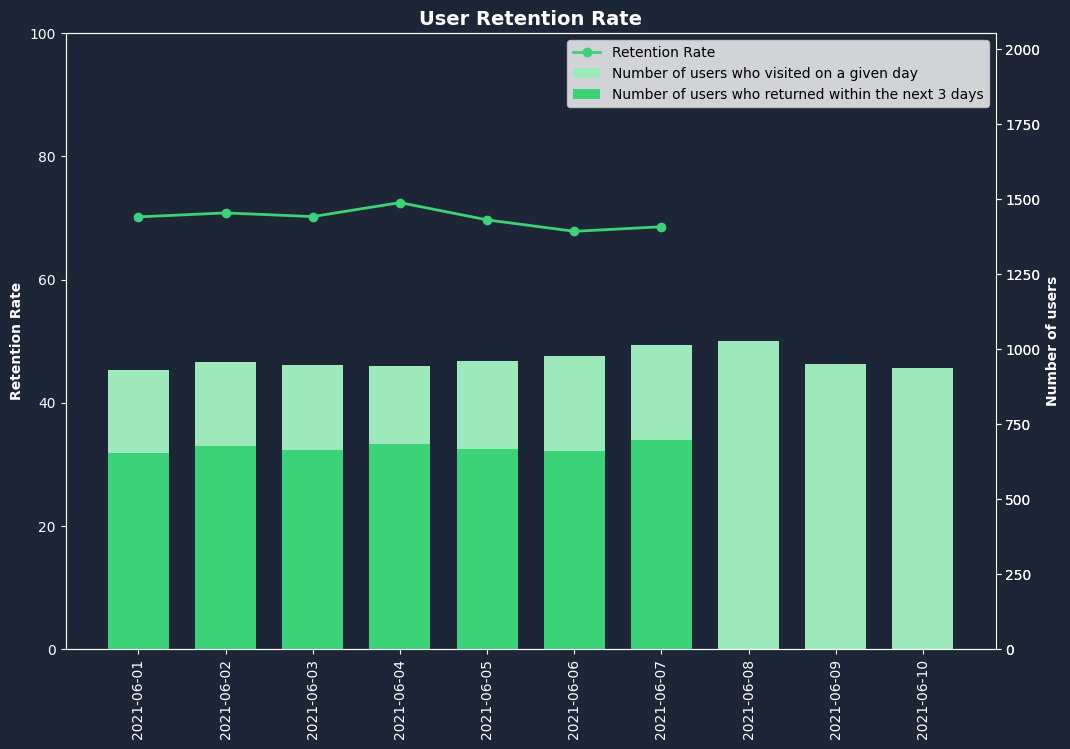

In [19]:
plt.rcParams['figure.figsize'] = [12, 8]

# Create figure and axis #1
fig, ax1 = plt.subplots()

# line chart on axis #1
ax1.plot(retention.index, retention['retention_rate'], color='#3cd278', linewidth=2, marker='o', label='Retention Rate') 
ax1.set_ylabel('Retention Rate', fontweight='bold')
ax1.set_ylim(0, 100)

# colors
ax1.set_facecolor('#1c2637')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='x', labelrotation = 90)
ax1.tick_params(axis='y', colors='white')
ax1.yaxis.label.set_color('white')

# set up the 2nd axis
ax2 = ax1.twinx()

# bar chart on axis #2
ax2.bar(uq_user_daily_count.index, uq_user_daily_count['user_count'], width=0.7, alpha=1, color='#9ee9bb', label='Number of users who visited on a given day')
ax2.grid(False) # grid #2 off
ax2.set_ylabel('Number of users', fontweight='bold')
ax2.set_ylim(0, 2*max(uq_user_daily_count['user_count']))

# colors
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')

# set up the 3rd axis
ax3 = ax1.twinx()

# bar chart on axis #3
ax3.bar(retention.index, retention['returned'], width=0.7, alpha=1, color='#3cd278', label='Number of users who returned within the next 3 days')
ax3.grid(False) # grid #3 off
ax3.set_ylim(0, 2*max(uq_user_daily_count['user_count']))
ax3.title.set_color('white')
ax3.spines['right'].set_visible(False)

# colors
ax3.spines['bottom'].set_color('white')
ax3.spines['top'].set_color('white') 
ax3.spines['right'].set_color('white')
ax3.spines['left'].set_color('white')
ax3.tick_params(axis='y', colors='white')
ax3.yaxis.label.set_color('white')

fig.legend(loc="upper right", bbox_to_anchor=(0.90,0.88))
plt.title('User Retention Rate', fontsize=14, fontweight='bold')
#plt.savefig('user_retention_rate.png')
fig.set_facecolor('#1c2637')
plt.show()

### **Retention in categories**

**Filtering the data where category data is available**

In [20]:
data_categories = data[data['category_name_1'].notna()].reset_index(drop=True)
data_categories.head()

,user_id,session_id,time_stamp,event_name,ad_id,channel,category_name_1,category_name_2
0,0js5cbihkrtm,mz7esaiegnu2lgoe,2021-06-08,ad_page,22954313.0,ios,Houses,Houses for Rent
1,hfcv6jzqdyc2,ysvt0s0arwter1f0,2021-06-10,ad_page,80901654.0,android,Houses,Houses for Sale
2,2gy5w2efifmn,0n9t19wcqg876d8s,2021-06-04,ad_page,28496574.0,android,Other,OtherSale
3,sbsi12grwbsa,szfo2313uc2tt7mh,2021-06-08,ad_page,9081792.0,android,Apartments,Apartments for Rent
4,c3qbpmeiwfca,xn4dzy7su6sxx4hi,2021-06-07,ad_page,84177254.0,android,Houses,Houses for Sale


**Are users only visiting one category?**

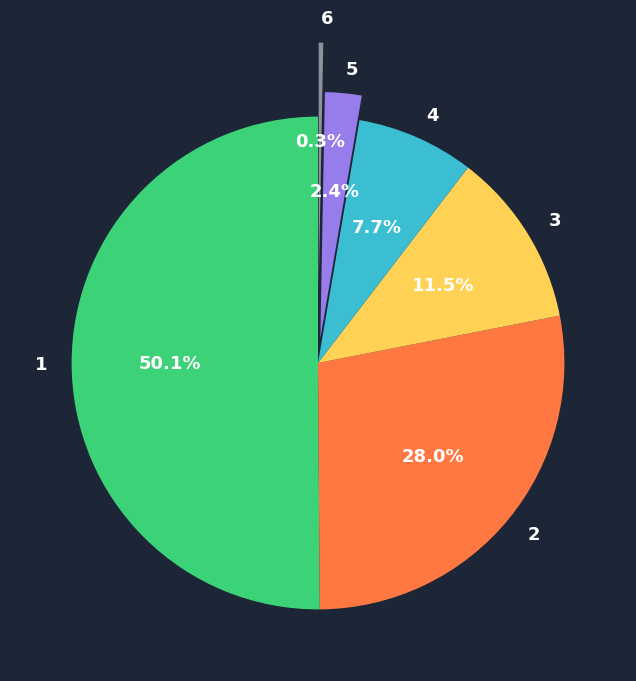

,users_nb
categories_visited,
1,1525
2,851
3,350
4,235
5,73
6,9


In [21]:
user_uq_category = data_categories.drop_duplicates(subset=['user_id', 'category_name_1'])
uq_user_category_count = pd.DataFrame(user_uq_category.groupby(['user_id'])['category_name_1'].count()).reset_index()
uq_user_category_count = uq_user_category_count.groupby('category_name_1').count()
uq_user_category_count.reset_index(inplace=True)
uq_user_category_count.columns = ['categories_visited', 'users_nb']

fig, ax1 = plt.subplots()
ax1.pie(uq_user_category_count['users_nb'], labels=uq_user_category_count['categories_visited'], autopct='%1.1f%%', startangle=90, explode=(0., 0., 0., 0., 0.1, 0.3),
        textprops={'color':"w", 'fontweight': 'bold', 'fontsize': '13'}, colors=['#3cd278', '#ff7841', '#ffd255', '#3cbed2', '#967deb', '#8e939b'])
ax1.tick_params(axis='y', colors='white')

#plt.savefig('cateogries_pie.png')
fig.set_facecolor('#1c2637')
plt.show()
pd.DataFrame(uq_user_category_count).set_index('categories_visited')

In a given timeframe:
* Over 50% of users visit only one category
* All 6 categories were visited by only 0.3% of the users

**Exploring values of categories_1**

In [22]:
data_categories['category_name_1'].value_counts()

Apartments     49710
Houses         37832
Plots           9461
Commercials     5905
Other           1201
Unknown           91
Name: category_name_1, dtype: int64

Apartments and Houses seem to be the most popular categories among users.

**Retention based on category_1**

In [23]:
category_1 = ['Apartments', 'Houses', 'Plots', 'Commercials']

for i in category_1:
    # Filters DataFrame based on category_1
    data_one_category = data_categories[data_categories['category_name_1']==i]

    data_uq_user_cateogry = functions.uniques_users_daily(data_one_category)

    retention = functions.retention_calculator(data_uq_user_cateogry)
    print('Category_1:', i)
    print(retention)
    print('Avg. retention rate:', round(retention['retention_rate'].mean(), 2), '\n')

Category_1: Apartments
            retention_rate
date                      
2021-06-01           66.85
2021-06-02           70.34
2021-06-03           68.35
2021-06-04           70.26
2021-06-05           70.63
2021-06-06           67.88
2021-06-07           67.79
Avg. retention rate: 68.87 

Category_1: Houses
            retention_rate
date                      
2021-06-01           64.04
2021-06-02           65.53
2021-06-03           65.32
2021-06-04           66.74
2021-06-05           64.25
2021-06-06           60.99
2021-06-07           61.01
Avg. retention rate: 63.98 

Category_1: Plots
            retention_rate
date                      
2021-06-01           50.00
2021-06-02           50.00
2021-06-03           51.45
2021-06-04           50.00
2021-06-05           50.93
2021-06-06           45.30
2021-06-07           50.27
Avg. retention rate: 49.71 

Category_1: Commercials
            retention_rate
date                      
2021-06-01           38.37
2021-06-02         

**Exploring values of categories_2**

In [24]:
data_categories.groupby(['category_name_1', 'category_name_2'])['user_id'].count()

category_name_1  category_name_2     
Apartments       Apartments for Rent     28102
                 Apartments for Sale     21608
Commercials      Commercials for Rent     2564
                 Commercials for Sale     3341
Houses           Houses for Rent          7759
                 Houses for Sale         30073
Other            OtherRent                 481
                 OtherSale                 720
Plots            Plots for Rent            336
                 Plots for Sale           9125
Unknown          Exchange                   91
Name: user_id, dtype: int64

Houses for Sale is the most popular category, however Apartments for Rent and Apartments for Sale are close behind as 2nd and 3rd place.

**Retention based on category_2**

In [25]:
category_2 = ['Apartments for Sale', 'Houses for Sale', 'Commercials for Sale', 
            'Apartments for Rent', 'Houses for Rent', 'Commercials for Rent',
            'Plots for Sale']

for i in category_2:
    # Filters DataFrame based on category_2
    data_one_category = data_categories[data_categories['category_name_2']==i]

    data_uq_user_cateogry = functions.uniques_users_daily(data_one_category)

    retention = functions.retention_calculator(data_uq_user_cateogry)
    print('Category_2:', i)
    print(retention)
    print('Avg. retention rate:', round(retention['retention_rate'].mean(), 2), '\n')

Category_2: Apartments for Sale
            retention_rate
date                      
2021-06-01           65.13
2021-06-02           61.33
2021-06-03           58.31
2021-06-04           64.07
2021-06-05           66.32
2021-06-06           64.54
2021-06-07           63.98
Avg. retention rate: 63.38 

Category_2: Houses for Sale
            retention_rate
date                      
2021-06-01           65.92
2021-06-02           63.78
2021-06-03           61.98
2021-06-04           66.27
2021-06-05           62.80
2021-06-06           58.15
2021-06-07           61.04
Avg. retention rate: 62.85 

Category_2: Commercials for Sale
            retention_rate
date                      
2021-06-01           43.33
2021-06-02           38.71
2021-06-03           38.57
2021-06-04           39.06
2021-06-05           49.28
2021-06-06           40.62
2021-06-07           36.25
Avg. retention rate: 40.83 

Category_2: Apartments for Rent
            retention_rate
date                      
2021-

### **Retention in channels**

**Exploring values of channel**

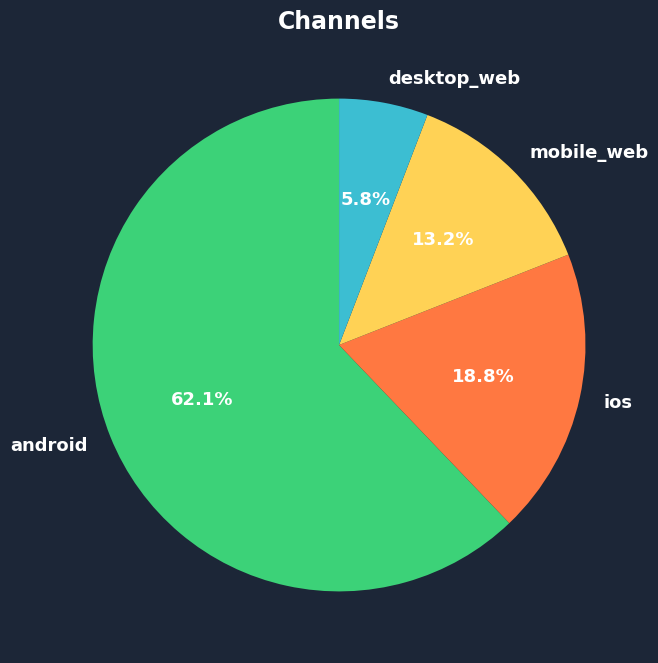

,channel
android,182725
ios,55389
mobile_web,38775
desktop_web,17163


In [26]:
channels_summary = data['channel'].value_counts()

fig, ax1 = plt.subplots()
ax1.pie(channels_summary.values, labels=channels_summary.index, autopct='%1.1f%%', startangle=90,
        textprops={'color':"w", 'fontweight': 'bold', 'fontsize': '13'}, colors=['#3cd278', '#ff7841', '#ffd255', '#3cbed2'])
ax1.tick_params(axis='y', colors='white')

#plt.savefig('channels_pie.png')
fig.set_facecolor('#1c2637')
plt.title('Channels', fontsize=17, color='w', fontweight='bold')
plt.show()

pd.DataFrame(channels_summary)

Android is by far the most popular channel.

**Retention based on channel**

In [27]:
data_channels = data[data['channel'].notna()].reset_index(drop=True)
data_channels.head()

,user_id,session_id,time_stamp,event_name,ad_id,channel,category_name_1,category_name_2
0,g97t07v0wif2,ffa6acsavya608i3,2021-06-01,listing,NaN,android,NaN,NaN
1,5uhpyit6k11p,2vdknsqr0w4g8vkl,2021-06-07,listing,NaN,desktop_web,NaN,NaN
2,ouq25xxc0ey4,dpxkyy1bx9bff0si,2021-06-06,listing,NaN,mobile_web,NaN,NaN
3,696mc67vw4d4,6ggi8wvn27777s3l,2021-06-06,listing,NaN,android,NaN,NaN
4,t9fnztgbvj5d,9adjw1gu1fdk0bpf,2021-06-02,listing,NaN,android,NaN,NaN


In [28]:
channels = data['channel'].unique()

for i in channels:
    # Filters DataFrame based on channel
    data_one_channel = data_channels[data_channels['channel']==i]

    data_uq_user_channel = functions.uniques_users_daily(data_one_channel)

    retention = functions.retention_calculator(data_uq_user_channel)
    print('Channel:', i)
    print(retention)
    print('Avg. retention rate:', round(retention['retention_rate'].mean(), 2), '\n')

Channel: android
            retention_rate
date                      
2021-06-01           78.40
2021-06-02           81.40
2021-06-03           81.33
2021-06-04           80.66
2021-06-05           80.89
2021-06-06           79.89
2021-06-07           79.29
Avg. retention rate: 80.27 

Channel: desktop_web
            retention_rate
date                      
2021-06-01           44.21
2021-06-02           45.45
2021-06-03           50.79
2021-06-04           50.00
2021-06-05           51.52
2021-06-06           41.33
2021-06-07           39.62
Avg. retention rate: 46.13 

Channel: mobile_web
            retention_rate
date                      
2021-06-01           42.36
2021-06-02           40.76
2021-06-03           39.38
2021-06-04           46.41
2021-06-05           36.00
2021-06-06           35.71
2021-06-07           41.52
Avg. retention rate: 40.31 

Channel: ios
            retention_rate
date                      
2021-06-01           83.33
2021-06-02           77.98
2021-

### **Hypothesis verification**

**Task:** Verify hypothesis that users using ios have higher retention rate than users using mobile web version.

**ios users**

In [29]:
data_channels = data[data['channel'].notna()].reset_index(drop=True)
data_one_channel = data_channels[data_channels['channel']=='ios']
data_uq_user_channel = functions.uniques_users_daily(data_one_channel)
retention = functions.retention_calculator(data_uq_user_channel)

ios_users = np.array(retention['retention_rate'])
ios_users, ios_users.mean()

(array([83.33, 77.98, 71.04, 81.25, 75.56, 75.14, 78.03]), 77.47571428571429)

**mobile_web users**

In [30]:
data_channels = data[data['channel'].notna()].reset_index(drop=True)
data_one_channel = data_channels[data_channels['channel']=='mobile_web']
data_uq_user_channel = functions.uniques_users_daily(data_one_channel)
retention = functions.retention_calculator(data_uq_user_channel)

mobile_web_users = np.array(retention['retention_rate'])
mobile_web_users, mobile_web_users.mean()

(array([42.36, 40.76, 39.38, 46.41, 36.  , 35.71, 41.52]), 40.30571428571428)

In [41]:
boxplot_data = pd.DataFrame({"ios_users": ios_users, "mobile_web_users": mobile_web_users})
boxplot_data

,ios_users,mobile_web_users
0,83.33,42.36
1,77.98,40.76
2,71.04,39.38
3,81.25,46.41
4,75.56,36.00
5,75.14,35.71
6,78.03,41.52


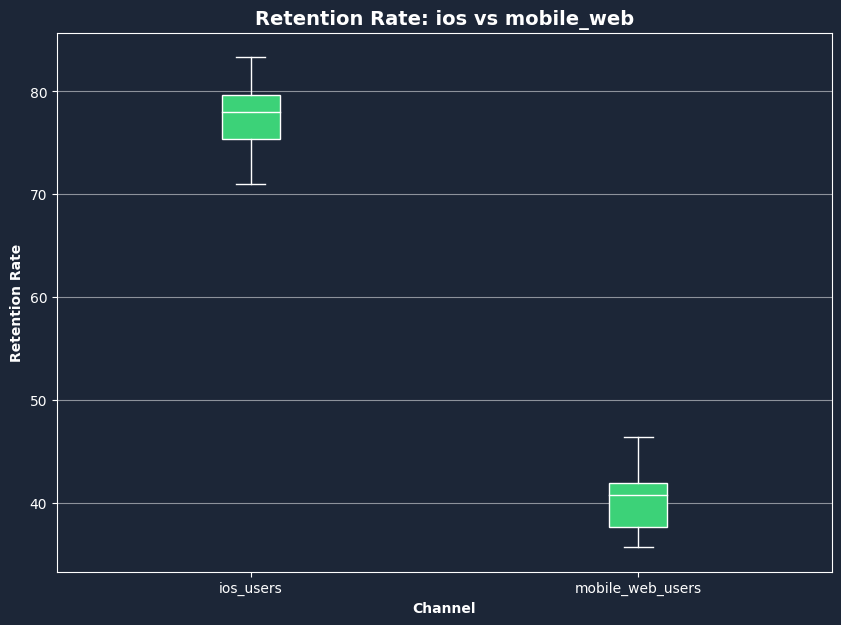

In [90]:
labels = ['ios_users', 'mobile_web_users']
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

plt.boxplot(boxplot_data, vert=True, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="#3cd278", color='w'),
            capprops=dict(color='w'),
            whiskerprops=dict(color='w'),
            flierprops=dict(color='w', markeredgecolor='w'),
            medianprops=dict(color='w'),
            )

fig.set_facecolor('#1c2637')
ax.set_facecolor('#1c2637')

ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('w')
ax.tick_params(axis='x', colors='w')
ax.tick_params(axis='y', colors='w')
ax.yaxis.label.set_color('w')
ax.xaxis.label.set_color('w')

plt.grid(axis='y', alpha=0.5, color='w')
ax.set_ylabel('Retention Rate', fontweight='bold')
ax.set_xlabel('Channel', fontweight='bold')
plt.title('Retention Rate: ios vs mobile_web', fontsize=14, color='w', fontweight='bold')
plt.show()

At first glance, you can see the retention rate for **ios users** is way higher than for **mobile_web users**.

**Normality check**

In [32]:
# Shapiro test

# H0: Data is normally distributed
# H1: Data is not normally distributed

def check_normality(data):
    test_stat, p_value=stats.shapiro(data)
    print('p-value:', round(p_value, 6))
    if p_value <0.05:
        print("Data is not normally distributed.")
    else:
        print("Data is normally distributed.")

In [33]:
check_normality(ios_users)

p-value: 0.934858
Data is normally distributed.


In [34]:
check_normality(mobile_web_users)

p-value: 0.691658
Data is normally distributed.


**Variance homogeneity check**

In [35]:
# Levene's test

#H0: The variances of the samples are same.
#H1: The variances of the samples are different.

def check_variance_homogeneity(group1, group2):
    test_stat, p_value = stats.levene(group1,group2)
    print('p-value:', round(p_value, 6))
    if p_value <0.05:
        print("Variances of the samples are different.")
    else:
        print("Variances of the samples are same.")

In [36]:
check_variance_homogeneity(ios_users, mobile_web_users)

p-value: 0.85811
Variances of the samples are same.


Samples have normal distribution and their variances are similar.

**Student's t-test for 2 independent samples**

H0: ios users have smaller or equal retention rate than mobile web users.  
H1: ios users have higher retention rate than mobile web users. 

In [37]:
def check_ttest(group1, group2):
    ttest, p_value = stats.ttest_ind(group1, group2)
    print('p-value:', round(p_value, 6))
    print('p_value_one_sided:', round(p_value/2, 6))
    if p_value/2 <0.05:
        print("Reject null hypothesis.")
    else:
        print("Fail to reject null hypothesis.")

In [38]:
check_ttest(ios_users, mobile_web_users)

p-value: 0.0
p_value_one_sided: 0.0
Reject null hypothesis.


At this significance level, there is enough evidence to conclude that the average retention rate for ios users in higher than mobile web users.